In [1]:
from sklearn import metrics
import numpy as np
from my_ml_package.clustering.metrics import silhouette_score, calculate_distortion, calculate_purity

In [2]:
# Adults (A): Average height is around 170 cm to 180 cm, and weight is around 70 kg to 80 kg.
# Babies (B): Average height might be around 50 cm to 70 cm (considering infants to toddlers), and weight could be around 3 kg to 10 kg.
X = np.array([
    [175, 75],  # Adult
    [60, 5],    # Baby
    [50, 4],    # Baby
    [70, 7],    # Baby
    [180, 80]   # Adult
])

y =          ['A',  'B', 'B', 'B', 'A',]
y_pred =     [ 1,    2,   2,   2,   2, ]

# MARGARET: how close the points are to each other within the same cluster.
# AKIN: get inter distance and intro distance between datapoints and between clusters

## Purity 
* A supervised metric
* Similar to accuracy
* How to match the ground-truth labels and cluster labels?

In [16]:
# cm = metrics.cluster.contingency_matrix(y, y_pred)
# print(cm)
# #     1, 2
# # A  [[1 1]
# # B   [0 3]]

# correct_predictions = np.amax(cm, axis=0) # Assign each cluster to the class most frequent in the cluster
# purity_score =  np.sum(correct_predictions) / np.sum(cm) 
# print(f"Purity Score: {purity_score}")




[[1 1]
 [0 3]]


0.8

## Distortion
**Within Cluster Sum of Squares (WCSS)**

In [10]:
distortion = calculate_distortion(X, y_pred)
print(f"Distortion: {distortion}")

Distortion: 15186.0


## Silhouette Coefficient
The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed clusters

* a: The mean distance between a data point and all other points in the same cluster.
* b: The mean distance between a data point and all other points in **the next nearest cluster**.
* The silhouette score $S$ for a single data point is then calculated using the formula:
$$S=\frac{b-a}{\max (a, b)}$$
<!-- I refer to [this web for silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). -->
Questions:
* How to identify **the next neareat cluster**?
* What does it measure?
  * Cohesion (how close points are to other points in the same cluster) and 
  * Separation (how distinct or well-separated a cluster is from other clusters)
  * In summary, it measure how similar an object is to its own cluster compared to other clusters
* What do 1, 0, -1 mean?

In [9]:
print(f'Mean Silhouette Score: {silhouette_score(X, y_pred)}')
# print(f'Mean Silhouette Score:{metrics.silhouette_score(X, labels)}')

Mean Silhouette Score: 0.8088985194499744


In [ ]:
# print(f"Adjusted Rand index for K-Means performance: {metrics.adjusted_rand_score(y, y_pred)}")
# Mutual Information
# print(f"Normalized mutual information for K-Means performance: {metrics.normalized_mutual_info_score(y, y_pred)}")

## Plotting (Hyperparameter vs Metrics)
<!-- (Peak? Elbow?) -->
<!-- Rather than looking for a point where the rate of increase sharply decreases (as there's no "decrease" in goodness to observe), you're looking for:

The peak value of the silhouette score across different k values, which indicates the best balance between cohesion within clusters and separation between clusters.
The point beyond which additional clusters do not meaningfully improve or may even worsen the silhouette score. This might manifest not as a traditional "elbow" but as a peak or plateau in the silhouette score plot. After reaching the peak score, the plot may plateau or start to decrease, indicating that the optimal number of clusters has been exceeded. -->


In [ ]:
# DO NOT use this high-level interface
# from yellowbrick.cluster import KElbowVisualizer

Distortion for 2 clusters: 229.66666666666666
Distortion for 3 clusters: 75.5
Distortion for 4 clusters: 25.0
Distortion for 5 clusters: 0.0


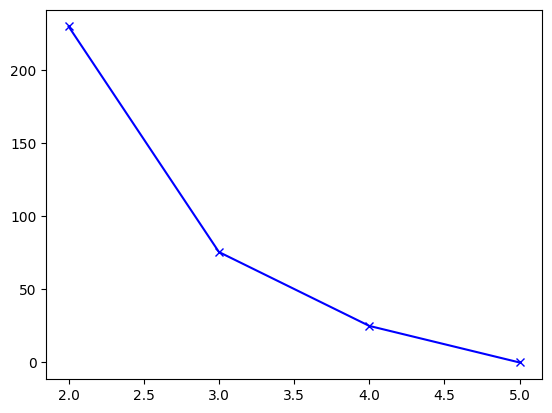

In [7]:
from my_ml_package.clustering.k_means import k_means, predict
import matplotlib.pyplot as plt

K = range(2, 6)
distortions = []
for k in range(2, 6):
    centroids, labels = k_means(X, k)
    distortion = calculate_distortion(X, labels)
    distortions.append(distortion)
    print(f"Distortion for {k} clusters: {distortion}")


plt.plot(K, distortions, 'bx-')